In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

C:\Users\ihrishi\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ihrishi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\ihrishi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [9]:
df= pd.read_csv("C:\\Users\ihrishi\Downloads\managedTripData.csv")

In [15]:
#df.sort_values(['dateOfDay'],inplace=True)

In [10]:
df.head(10)

,dateOfDay,RiderCode,dayOfYearS,dayOfMonthS,dayOfWeekS,timeslot,numOfTrips
0,09-09-2018,15628,252,9,1,2,4
1,09-09-2018,15498,252,9,1,3,10
2,09-09-2018,15234,252,9,1,2,9
3,09-09-2018,15576,252,9,1,2,6
4,09-09-2018,15490,252,9,1,3,29
5,09-09-2018,15434,252,9,1,3,12
6,09-09-2018,15650,252,9,1,3,3
7,09-09-2018,15648,252,9,1,2,8
8,09-09-2018,15864,252,9,1,2,4
9,09-09-2018,15424,252,9,1,2,3


In [11]:
df.shape

(185333, 7)

In [18]:
df['dateOfDay'] = pd.to_datetime(df.dateOfDay, format = '%d-%m-%Y')

In [20]:
df['year'] = df.dateOfDay.dt.year
df['month'] = df.dateOfDay.dt.month
df['day']= df.dateOfDay.dt.day

In [21]:
df.head()

,dateOfDay,RiderCode,dayOfYearS,dayOfMonthS,dayOfWeekS,timeslot,numOfTrips,year,month,day
dateOfDay,,,,,,,,,,
09-09-2018,2018-09-09,15628,252,9,1,2,4,2018,9,9
09-09-2018,2018-09-09,15498,252,9,1,3,10,2018,9,9
09-09-2018,2018-09-09,15234,252,9,1,2,9,2018,9,9
09-09-2018,2018-09-09,15576,252,9,1,2,6,2018,9,9
09-09-2018,2018-09-09,15490,252,9,1,3,29,2018,9,9


In [23]:
df['month'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2, 12, 11, 10,  1], dtype=int64)

In [24]:
df['day'].unique()

array([ 9,  8,  7,  6,  5,  4, 30,  3, 29, 28, 27, 26, 25, 24, 23, 22, 21,
       20,  2, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  1, 31],
      dtype=int64)

In [25]:
df['year'].unique()

array([2018, 2019, 2020, 2017], dtype=int64)

In [29]:
df['Day of week'] = df['dateOfDay'].dt.dayofweek
temp = df['dateOfDay']



def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = df['dateOfDay'].apply(applyer)
df['weekend'] = temp2

In [30]:
df.head()

,dateOfDay,RiderCode,dayOfYearS,dayOfMonthS,dayOfWeekS,timeslot,numOfTrips,year,month,day,Day of week,weekend
dateOfDay,,,,,,,,,,,,
09-09-2018,2018-09-09,15628,252,9,1,2,4,2018,9,9,6,1
09-09-2018,2018-09-09,15498,252,9,1,3,10,2018,9,9,6,1
09-09-2018,2018-09-09,15234,252,9,1,2,9,2018,9,9,6,1
09-09-2018,2018-09-09,15576,252,9,1,2,6,2018,9,9,6,1
09-09-2018,2018-09-09,15490,252,9,1,3,29,2018,9,9,6,1


In [32]:
df.sort_values(['dateOfDay'],inplace=True)

In [33]:
df.head()

,dateOfDay,RiderCode,dayOfYearS,dayOfMonthS,dayOfWeekS,timeslot,numOfTrips,year,month,day,Day of week,weekend
dateOfDay,,,,,,,,,,,,
2017-12-01,2017-12-01,15789,335,1,6,3,1,2017,12,1,4,0
2017-12-03,2017-12-03,15604,337,3,1,1,2,2017,12,3,6,1
2017-12-05,2017-12-05,15432,339,5,3,3,1,2017,12,5,1,0
2017-12-05,2017-12-05,15420,339,5,3,3,1,2017,12,5,1,0
2017-12-05,2017-12-05,15564,339,5,3,1,1,2017,12,5,1,0


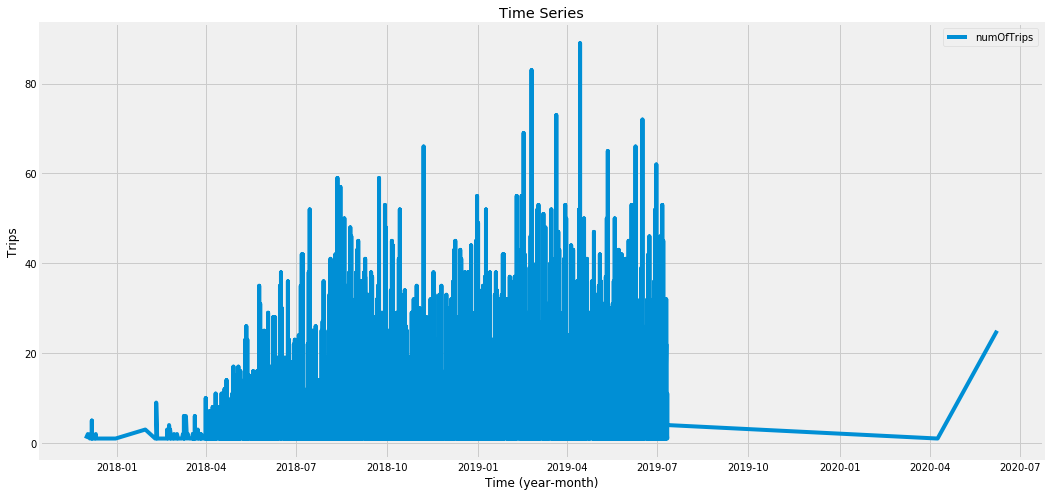

In [34]:
df.index = df['dateOfDay']
ts = df['numOfTrips']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Trips")
plt.legend(loc = 'best')

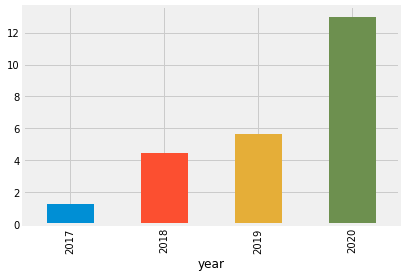

In [35]:
df.groupby('year')['numOfTrips'].mean().plot.bar()

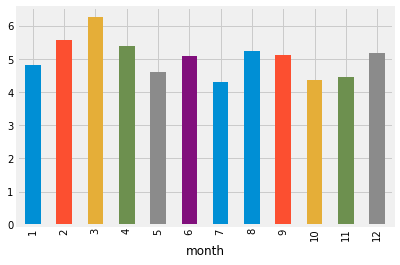

In [36]:
df.groupby('month')['numOfTrips'].mean().plot.bar()

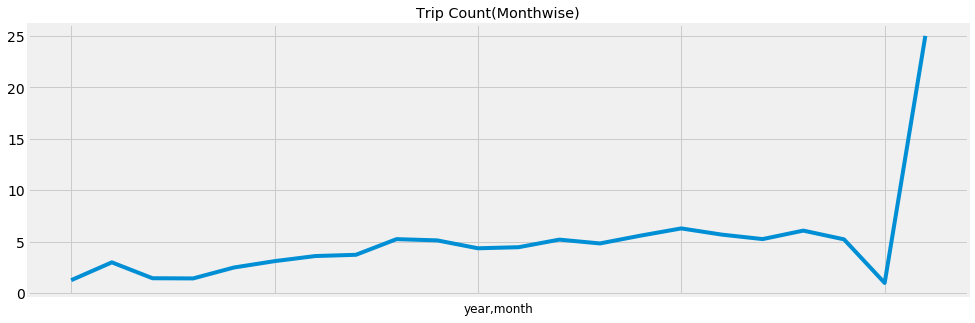

In [40]:
temp = df.groupby(['year', 'month'])['numOfTrips'].mean()
temp.plot(figsize =(15,5), title = "Trip Count(Monthwise)", fontsize = 14)

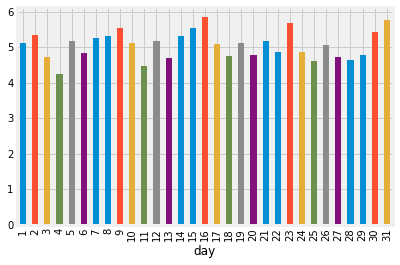

In [42]:
df.groupby('day')['numOfTrips'].mean().plot.bar()

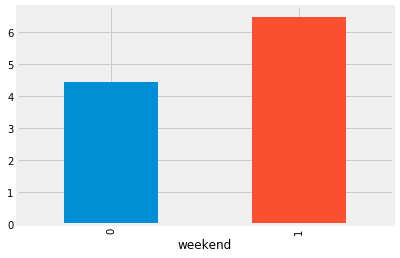

In [45]:
df.groupby('weekend')['numOfTrips'].mean().plot.bar()

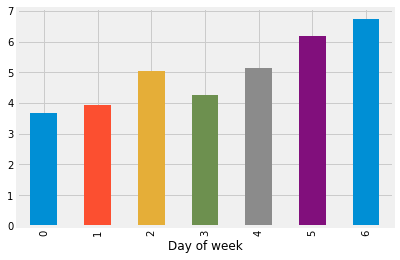

In [46]:
df.groupby('Day of week')['numOfTrips'].mean().plot.bar()

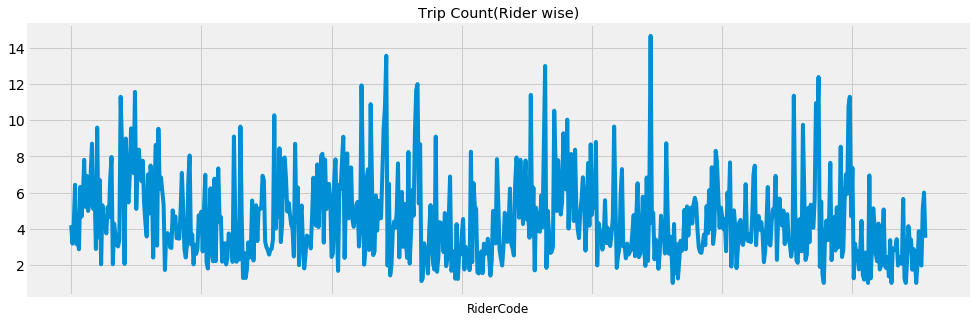

In [55]:
temp = df.groupby(['RiderCode'])['numOfTrips'].mean()
temp.plot(figsize =(15,5), title = "Trip Count(Rider wise)", fontsize = 14)

In [69]:
df.iloc[154444]

dateOfDay      2019-05-10 00:00:00
RiderCode                    15400
dayOfYearS                     130
dayOfMonthS                     10
dayOfWeekS                       6
timeslot                         2
numOfTrips                       1
year                          2019
month                            5
day                             10
Day of week                      4
weekend                          0
Name: 2019-05-10 00:00:00, dtype: object

In [70]:
Train = df.ix['2018-4-4':'2019-05-10']
valid = df.ix['2019-05-10':'2019-7-3']

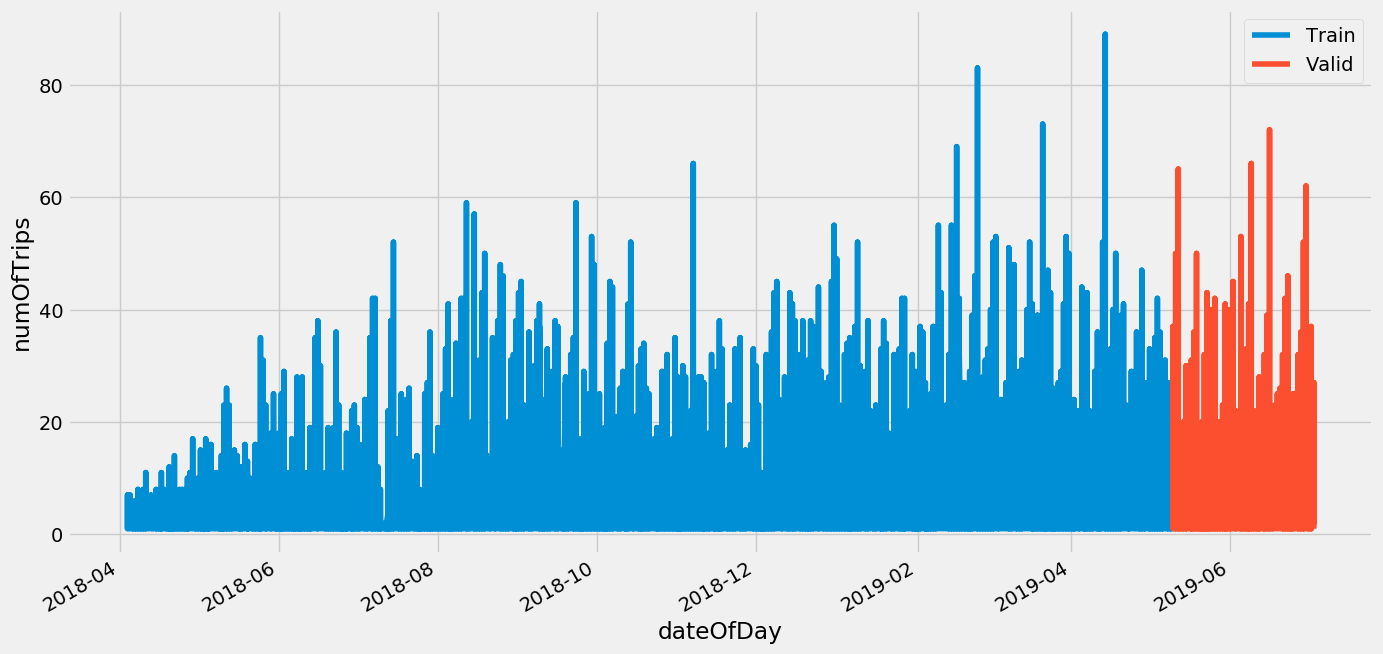

In [71]:
Train.numOfTrips.plot(figsize = (15,8), fontsize = 14, label = 'Train')
valid.numOfTrips.plot(figsize = (15,8),fontsize =14, label = 'Valid')
plt.xlabel('dateOfDay')
plt.ylabel('numOfTrips')
plt.legend(loc = 'best')

#### TODO: drop the outliers

### Forecast Begins here-

imp resources-

1. https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/23_Time-Series-Prediction.ipynb
2. https://github.com/llSourcell/Time_Series_Prediction/blob/master/Time%20Series.ipynb
3. https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1


In [66]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt

<Figure size 1600x800 with 0 Axes>

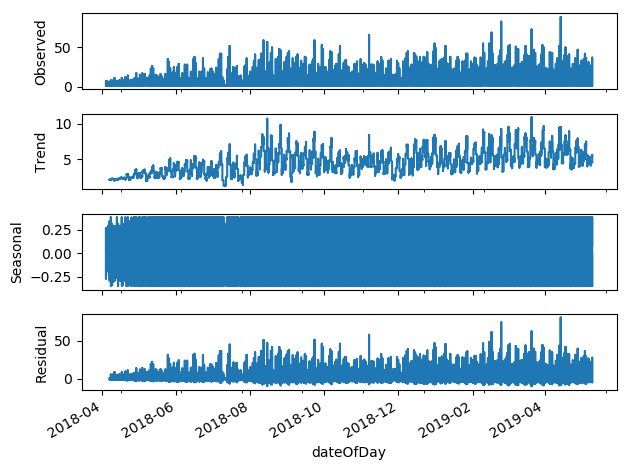

In [95]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.numOfTrips,freq=160).plot()
result = sm.tsa.stattools.adfuller(df.numOfTrips)
plt.show()

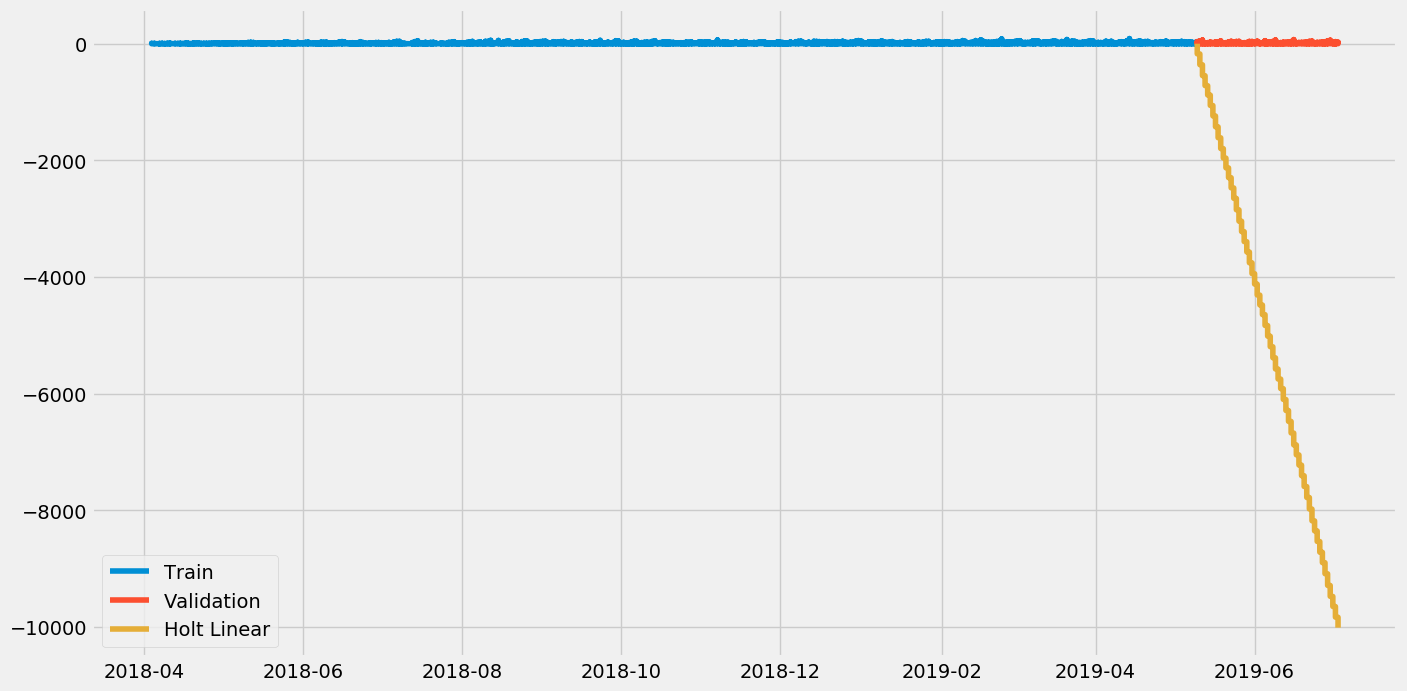

In [74]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['numOfTrips'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.numOfTrips, label = 'Train')
plt.plot(valid.numOfTrips, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [76]:
rmse = sqrt(mean_squared_error(valid.numOfTrips, y_hat_holt.Holt_linear))
rmse

5784.43182752927

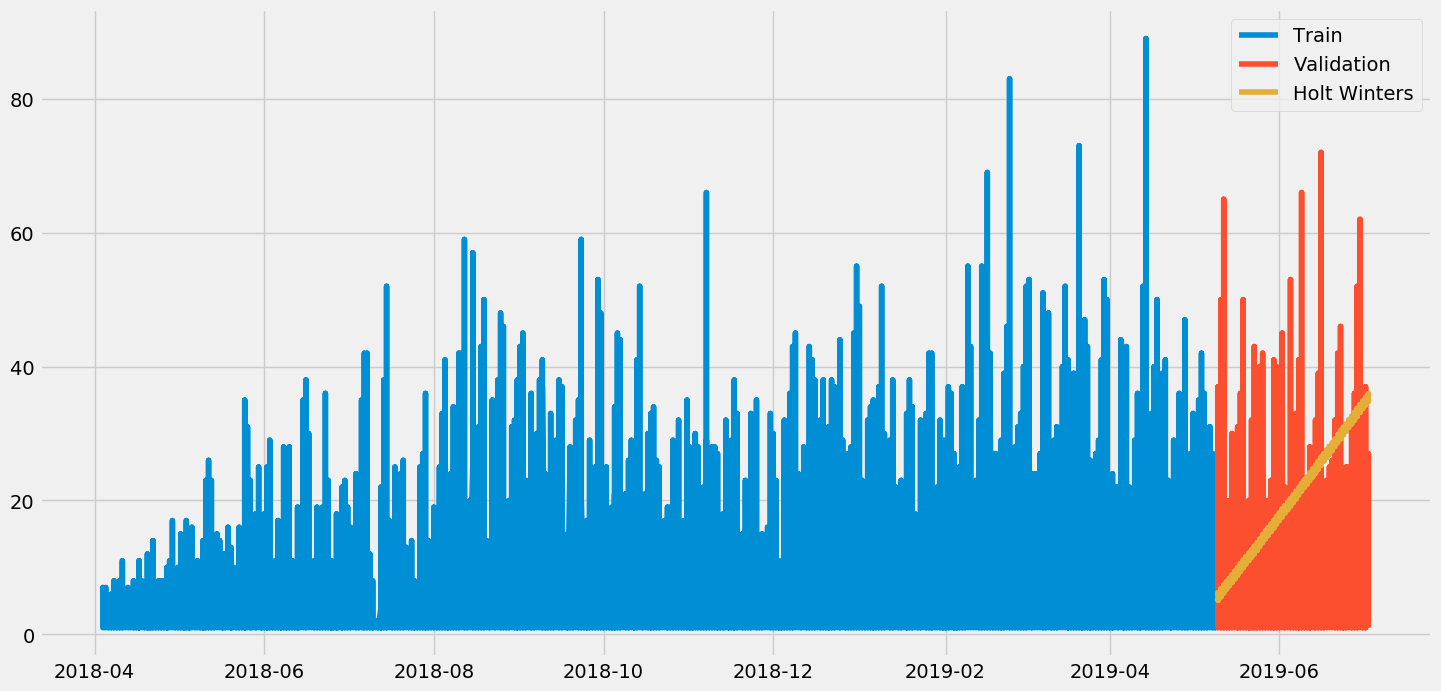

In [90]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['numOfTrips']), seasonal_periods= 4, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['numOfTrips'], label = 'Train')
plt.plot(valid['numOfTrips'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [91]:
y_hat_avg.Holt_Winter.unique()

array([ 5.48340214,  5.38132278,  5.70052652, ..., 35.34837982,
       35.73955703, 35.63747766])

In [94]:
rmse = sqrt(mean_squared_error(valid.numOfTrips, y_hat_avg.Holt_Winter))
rmse

18.14736715376454

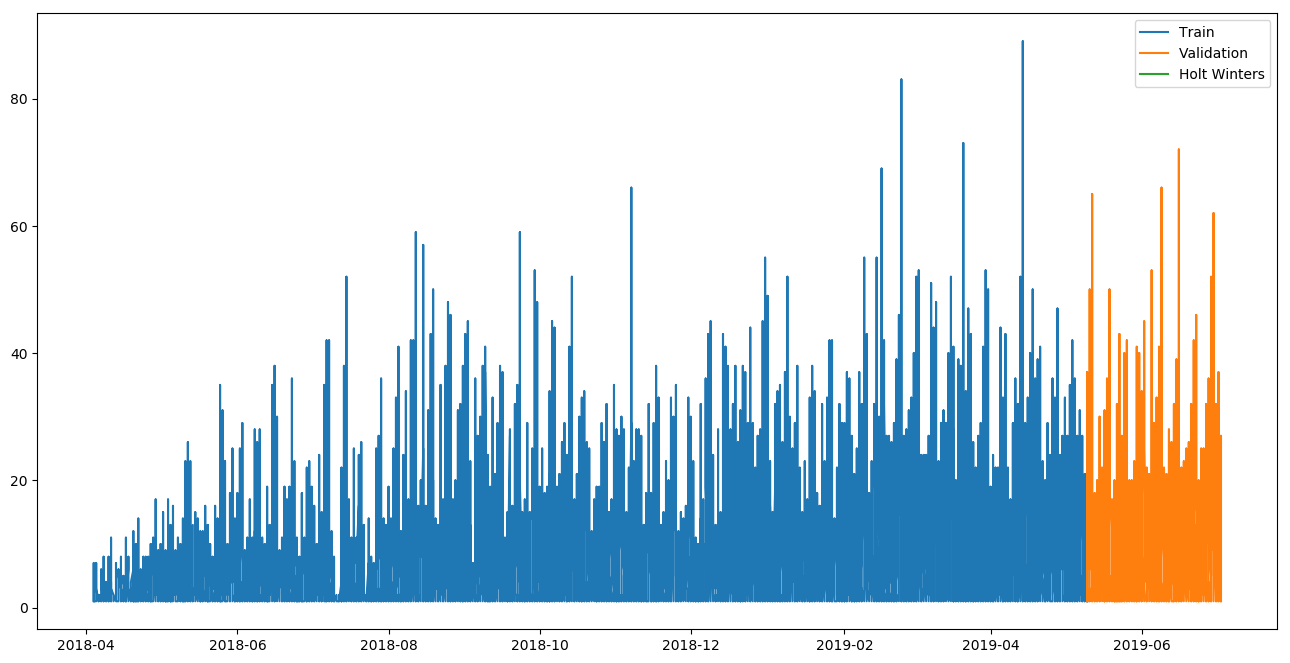

In [101]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['numOfTrips']), seasonal_periods= 3, trend = 'mul',seasonal='mul').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['numOfTrips'], label = 'Train')
plt.plot(valid['numOfTrips'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [ ]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['numOfTrips']), seasonal_periods= 3, trend = 'mul',seasonal='mul').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
#plt.plot(Train['numOfTrips'], label = 'Train')
plt.plot(valid['numOfTrips'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')